In [51]:
# working with radioactive decay CHAIN with following knowns
# Na -> Nb -> stable
# N(t) = N0 Exp[-t/tau]
# dN/dt = -(1/tau) N(t)
# tau = t_half / ln(2)

import math
import numpy as np
from scipy.integrate import solve_ivp

# for solve_ivp, this needs to be of the form:
# name(time, variables, args)
def dN_dt(t, state, tau_a, tau_b): 
    Na, Nb, Nstable = state

    dNa = -Na/tau_a
    dNb = Na/tau_a + -Nb/tau_b
    dNstable = Nb/tau_b

    return [dNa, dNb, dNstable]
    
ta_half = 10 # seconds
tau_a = ta_half/math.log(2.0)
tb_half = 15 # seconds
tau_b = tb_half/math.log(2.0)
N0a = 100 # number of intial atoms
N0b = 0 # number of intial atoms
N0stable = 0 # number of stable atoms at the end of the decay chain

tspan = [0,5*ta_half]
solution = solve_ivp(
    dN_dt, # derivative as function
    tspan,  # time interval to solve for
    [N0a, N0b, N0stable], # initial values
    args=(tau_a,tau_b,) # why does this have to have a comma?  needs to be a "tuple"????
    , method="RK45"
)

# this was helpful for syntax 
# https://simulationbased.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/comment-page-1/


In [53]:
print(solution)


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.443e-04  1.587e-03  1.601e-02  1.603e-01
             1.603e+00  6.105e+00  1.351e+01  2.334e+01  3.491e+01
             4.791e+01  5.000e+01]
        y: [[ 1.000e+02  1.000e+02 ...  3.615e+00  3.128e+00]
            [ 0.000e+00  1.000e-03 ...  2.194e+01  2.038e+01]
            [ 0.000e+00  3.333e-09 ...  7.445e+01  7.649e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0


In [55]:
print(solution.t)
print(solution.y[0])
print(solution.y[1])
print(solution.y[2])

[0.00000000e+00 1.44268061e-04 1.58694868e-03 1.60137548e-02
 1.60281816e-01 1.60296243e+00 6.10499339e+00 1.35132876e+01
 2.33381247e+01 3.49081427e+01 4.79110984e+01 5.00000000e+01]
[100.          99.99900001  99.98900071  99.88906269  98.8951598
  89.48413056  65.49702463  39.19355548  19.83773219   8.89833106
   3.61519577   3.12787664]
[0.00000000e+00 9.99981667e-04 1.09988817e-02 1.10896265e-01
 1.10075118e+00 1.01288928e+01 2.97660139e+01 4.30867998e+01
 4.25240525e+01 3.30870069e+01 2.19362239e+01 2.03817531e+01]
[0.00000000e+00 3.33324815e-09 4.03300620e-07 4.10438618e-05
 4.08901591e-03 3.86976640e-01 4.73696150e+00 1.77196447e+01
 3.76382153e+01 5.80146621e+01 7.44485803e+01 7.64903703e+01]


Text(0.5, 0, 'time (seconds), ta_1/2 = 10.00')

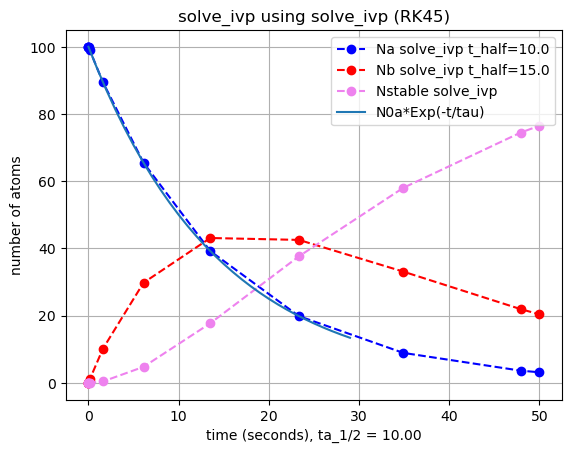

In [61]:
import matplotlib.pyplot as plt
plt.plot(solution.t,solution.y[0],label="Na solve_ivp t_half=%.1f"%ta_half, linestyle='--', marker='o', color='b')
plt.plot(solution.t,solution.y[1],label="Nb solve_ivp t_half=%.1f"%tb_half, linestyle='--', marker='o', color='r')
plt.plot(solution.t,solution.y[2],label="Nstable solve_ivp ", linestyle='--', marker='o', color='violet')
tvals=np.arange(0,3*ta_half)
plt.plot(tvals,N0a*np.exp(-tvals/tau_a), label="N0a*Exp(-t/tau)")
plt.grid()
plt.legend()
plt.title("solve_ivp using solve_ivp (RK45)")
plt.ylabel("number of atoms")
plt.xlabel("time (seconds), ta_1/2 = %.2f"%ta_half)